#  0.0 IMPORTS

In [2]:
import pandas as pd
import inflection
import math
import numpy as np

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

# 0.1 HELPER FUNCTIONS

# 0.2 LOARDING DATA


In [3]:
df_sales=  pd.read_csv(r'C:\Users\Administrador.000\Google Drive\repositorio\DS Produção/train.csv',low_memory=False)

df_store = pd.read_csv(r'C:\Users\Administrador.000\Google Drive\repositorio\DS Produção/store.csv',low_memory=False)

df_mesclar = pd.merge(df_sales,df_store, how='left',on='Store' )



In [4]:
df_mesclar.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
306138,683,6,2014-10-18,5924,599,1,0,0,0,a,a,2850.0,7.0,2014.0,0,NaN,NaN,NaN


#  1.0 DESCRIÇÃO DOS DADOS


In [5]:
df1 = df_mesclar.copy()

In [6]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.1 Rename Columns

In [8]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snackcase= lambda x: inflection.underscore( x )

new_cols = list(map(snackcase,cols_old))

df1.columns = new_cols

display(new_cols)

['store',
 'day_of_week',
 'date',
 'sales',
 'customers',
 'open',
 'promo',
 'state_holiday',
 'school_holiday',
 'store_type',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'promo_interval']

## 1.2 Data Dimension 

In [9]:
print('Number of Rows {}'.format(df1.shape[0]))
print('Number of Cols {}'.format(df1.shape[1]))

Number of Rows 1017209
Number of Cols 18


## 1.3 Data Types

In [10]:
df1['date'] =pd.to_datetime(df1['date'])

df1.dtypes




store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA


In [11]:
#total de dados faltantes dentro do arquivo
df1.isna().sum() 

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [12]:
df1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
625840,1111,3,2013-12-18,7452,623,1,1,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"


In [24]:

print(df1['competition_open_since_month'].max())

12.0


In [13]:
#competition_distance (compentição em metros- isso quer dizer a distância de uma loja para outra- qual a diferença de vendas)
#nesse caso ele aparece "NA" ou seja, vazio, pois não há ou não considerado um competidor proxima dessa unidade
#2000.0 seria uma distancia hipotetica

df1['competition_distance']= df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x )

#pecorra todas as linhas da coluna(apply), onde está vazio subtistuir pelo valor 20000 (x=2000) caso contrário também colocar
#20000 (que igual a x)

#competition_open_since_month  
# data de abertura de uma outra loja.Quando ela foi aberta? Ele pega uma fatia de meu público. 
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)


#leitura = pecorra todas as linha dessa coluna(apply) e aonde está vazio preencha com x['date'].mês, caso contrário permance como
#a data que está lá, pois não está vazio

#competition_open_since_year
# pecorrer todas as linhas vazias e preenche com o ano
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)


#promo2_since_week 
# quero preencher as NA (colunas vazias por data da semana) O algaritismo vai preencher
df1['promo2_since_week']= df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'],axis=1)
                                    

#promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x:x['date'].year if math.isnan(x['promo2_since_year'])else x['promo2_since_year'],axis=1)
#promo_interval              

month_map = {1: 'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

df1['promo_interval'].fillna(0, inplace=True)

df1['month_map']= df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval','month_map']].apply(lambda x: 0 if x['promo_interval'] ==0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0,axis=1)



In [14]:
df1.isna().sum()



store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 CHANGE TYPES

In [15]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [16]:

# competition of store
# promo2 in fomart date

df1['competition_distance']= df1['competition_distance'].astype('int64')
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')
df1['promo2_since_week'] = df1['promo2_since_week'].astype('int64')
df1['promo2_since_year'] = df1['promo2_since_year'].astype('int64')
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype('int64')

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                     int64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

# 1.7 Descriptive Stastical


In [17]:
num_attributes = df1.select_dtypes(include=['int64','float64']) ## somente numeros
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]']) #somente strings



# 1.7.1 Numerical Attribute

In [18]:
# Central Tendency -mean and mediana

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# std = desvio padrão ; rangew= a diferença do máximo e do minimo;

# dispersion - std, min, max, range, skew,, kurtosis

d1 = pd.DataFrame( num_attributes.apply(np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max) ).T
d4 = pd.DataFrame( num_attributes.apply(lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply(lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply(lambda x: x.kurtosis () ) ).T

#concatenar

metricas = pd.concat([d1,d2,d3,d4,d5,d6,ct1,ct2]).T.reset_index()

##renomear as colunas
metricas.columns= ['attributes','desvio(std)','minimo','maximo','range','skew','kurtosis','mean','median']

metricas

,attributes,desvio(std),minimo,maximo,range,skew,kurtosis,mean,median
0,store,321.908493,1.0,1115.0,1114.0,-0.000955,-1.200524,558.429727,558.0
1,day_of_week,1.997390,1.0,7.0,6.0,0.001593,-1.246873,3.998341,4.0
2,sales,3849.924283,0.0,41551.0,41551.0,0.641460,1.778375,5773.818972,5744.0
3,customers,464.411506,0.0,7388.0,7388.0,1.598650,7.091773,633.145946,609.0
4,open,0.375539,0.0,1.0,1.0,-1.758045,1.090723,0.830107,1.0
5,promo,0.485758,0.0,1.0,1.0,0.487838,-1.762018,0.381515,0.0
6,school_holiday,0.383056,0.0,1.0,1.0,1.677842,0.815154,0.178647,0.0
7,competition_distance,12547.646829,20.0,200000.0,199980.0,10.242344,147.789712,5935.442677,2330.0
8,competition_open_since_month,3.311085,1.0,12.0,11.0,-0.042076,-1.232607,6.786849,7.0
9,competition_open_since_year,5.515591,1900.0,2015.0,115.0,-7.235657,124.071304,2010.324840,2012.0


C:\Users\Administrador.000\anaconda3\envs\DateScienteEmProducao\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competition_distance'>

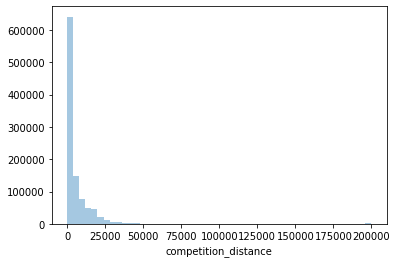

In [17]:
sns.distplot(df1['competition_distance'],kde=False)

## 1.7.2 Categorical Attribute

In [19]:
# unique = unico, ou seja ele pega todo mundo do DF1 ou de toda uma lista(como fosse uma soma)

# shape = forma: serve para vê todos os itens (somado) do DF ou da lista

cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

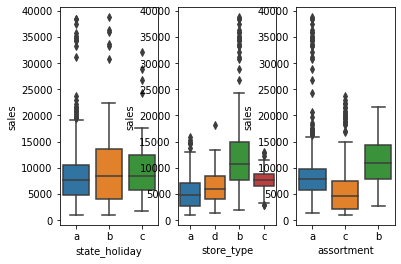

In [20]:
aux = df1[(df1['state_holiday'] != '0') & (df1['sales']> 0)]


plt.subplot(1,3,1)
sns.boxplot (x='state_holiday', y='sales',data=aux)
## no feriado b tem mais vendas do que no feriado A e C

plt.subplot(1,3,2)
sns.boxplot(x ='store_type',y='sales',data=aux)
#no tipo de loja, a loja b tem mais vendas que as demais lojas

plt.subplot(1,3,3)
sns.boxplot(x='assortment',y='sales',data=aux)

